In [9]:
from PIL import Image
from transformers import pipeline
import numpy as np
from pathlib import Path

import cv2

In [10]:
import cv2

# Create binary mask
b_mask = np.zeros(img.shape[:2], np.uint8)

#  Extract contour result
contour = c.masks.xy.pop()
#  Changing the type
contour = contour.astype(np.int32)
#  Reshaping
contour = contour.reshape(-1, 1, 2)


# Draw contour onto mask
_ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

NameError: name 'img' is not defined

In [48]:
init()


Device set to use cpu


depth est. init


bottle
Shape of mask3ch [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Shape of depth array [[49 50 50 ...  1  0  0]
 [49 49 49 ...  1  1  0]
 [49 49 48 ...  1  1  1]
 ...
 [72 73 73 ... 30 29 29]
 [74 74 74 ... 30 29 29]
 [73 75 75 ... 29 29 30]]


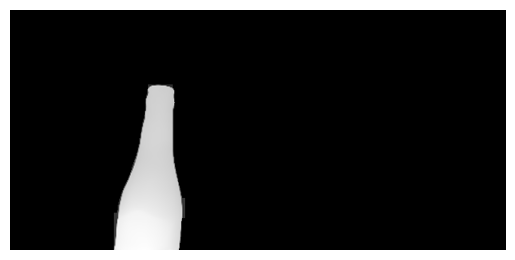

bottle
Shape of mask3ch [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Shape of depth array [[49 50 50 ...  1  0  0]
 [49 49 49 ...  1  1  0]
 [49 49 48 ...  1  1  1]
 ...
 [72 73 73 ... 30 29 29]
 [74 74 74 ... 30 29 29]
 [73 75 75 ... 29 29 30]]


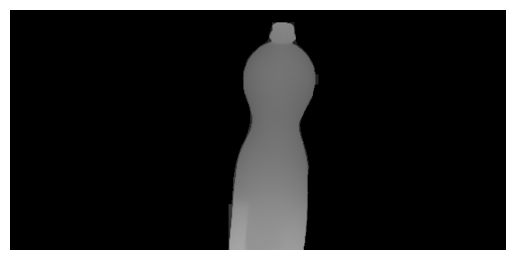

In [49]:
estimate(bottleFrameDetected, bottleBox, bottleMask, segmentResults)

In [46]:
from PIL import Image
from transformers import pipeline
import numpy as np

pipe = None

def init():
    global pipe
    pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")
    print("depth est. init")

def calculateDepth(picam_array):
    pi_image = Image.fromarray(picam_array)
    # inference
    depth = pipe(pi_image)["depth"]
    depth.save("output/depth_estimation.png")

    # calculate the depth of the bottle
    # calculate average depth of pixels inside mask
    depth_array = np.array(depth)
    return depth_array

def estimate(picam_array, bottleBox, masks, res):
    # Iterate detection results 
    for r in res:
        img = np.copy(r.orig_img)
        img_name = Path(r.path).stem

        # Iterate each object contour 
        for ci, c in enumerate(r):
            label = c.names[c.boxes.cls.tolist().pop()]
            print(label)

            # just a full black mask
            b_mask = np.zeros(img.shape[:2], np.uint8)

            # Create contour mask 
            contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
            _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

            # Choose one:

            # OPTION-1: Isolate object with black background
            mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
            # isolated = cv2.bitwise_and(mask3ch, img)

            depthImage = calculateDepth(picam_array)
            print("Shape of mask3ch" ,mask3ch)
            print("Shape of depth array", depthImage)

            # Convert depthImage to 3-channel image
            depthImage_3ch = cv2.cvtColor(depthImage, cv2.COLOR_GRAY2BGR)
            isolated = cv2.bitwise_and(mask3ch, depthImage_3ch)


            # OPTION-2: Isolate object with transparent background (when saved as PNG)
            # isolated = np.dstack([img, b_mask])

            # OPTIONAL: detection crop (from either OPT1 or OPT2)
            # x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)
            # iso_crop = isolated[y1:y2, x1:x2]
            import matplotlib.pyplot as plt

            # Display the isolated object using matplotlib
            plt.imshow(cv2.cvtColor(isolated, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()



def estimate2(picam_array, bottleBox, masks, results):
    pi_image = Image.fromarray(picam_array)
    # inference
    depth = pipe(pi_image)["depth"]
    depth.save("output/depth_estimation.png")

    # calculate the depth of the bottle
    # calculate average depth of pixels inside mask
    depth_array = np.array(depth)

    b_mask = np.zeros(depth_array.shape[:2], np.uint8)


    contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
    _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)
    average_depth = np.mean(contour)

    print(f"Average depth of the bottle: {average_depth}")

    return average_depth



In [3]:
import cv2
from picamera2 import Picamera2

from ultralytics import YOLO
from libcamera import Transform
import time

from depthest import init, estimate
print("init")

# Initialize the Picamera2
picam2 = Picamera2()
# default
# picam2.preview_configuration.main.size = (1280, 720)
picam2.preview_configuration.main.size = (640, 310)
# picam2.preview_configuration.main.size = (640 /2, 310/2)

picam2.preview_configuration.main.format = "RGB888"
picam2.preview_configuration.align()
picam2.preview_configuration.transform=Transform(vflip=1)
picam2.configure("preview")
picam2.start()


# Load the YOLO11 model
# have to run create model first 
segmentModel = YOLO("yolo11n-seg.pt")  
model = YOLO("yolo11n-cls.pt")

instantBreak = False


# used to record the time when we processed last frame 
prev_frame_time = 0
  
# used to record the time at which we processed current frame 
new_frame_time = 0
# font which we will be using to display FPS 
font = cv2.FONT_HERSHEY_SIMPLEX 

bottleFrameDetected = None
bottleFrameNew = None

results = None
bottleBox = None

while True:
    # time when we finish processing for this frame 
    # ! do all processing below this, and above the fps calculator
    new_frame_time = time.time() 

    # Capture frame-by-frame
    frame = picam2.capture_array()

    # Run YOLO11 inference on the frame
    results = model(frame)

    # print(results)
    # Visualize the results on the frame
    # annotated_frame = results[0].plot()

    new_frame_time = time.time() 
  
    # Calculating the fps 
    fps = 1/(new_frame_time-prev_frame_time) 
    prev_frame_time = new_frame_time 
    fps = int(fps) 
    fps = str(fps) 
    # cv2.putText(annotated_frame, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA) 
    print(fps)
    # Check if a bottle has been recognized
    for result in results:
        # probs = result.probs  # Probs object for classification outputs
        # print(probs)
        # classification model
        if result.probs != None:
            # print("Top 5 classes", result.probs.top5)
            # https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
            # 440: beer_bottle
            # 898: water bottle
            if 898 in result.probs.top5:
                print("Bottle found with class index 898")
                bottleFrameDetected = frame
                instantBreak = True
                break;


        # for detection in result.boxes:
        # #     # Assuming detection.cls is an integer index for the class
        #     bottleBox = detection
        #     if detection.cls == 39:  # correct class index for "bottle"
        #         print("Bottle recognized", )
        #         print("Probabilty", detection.conf)
        #         bottleFrameDetected = frame
        #         instantBreak = True
        #         break


    # Display the resulting frame
    # cv2.imshow("Camera", annotated_frame)

    if instantBreak:
        break
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) == ord("q"):
        print("")
        break

# Release resources and close windows
cv2.destroyAllWindows()

# https://docs.ultralytics.com/modes/predict/#__tabbed_1_1
if bottleFrameDetected is not None:
    # Capture a new frame of the bottle
    # should not be blurry
    bottleFrameNew = picam2.capture_array()
    cv2.imwrite("output/bottle_new.png", bottleFrameNew)

# Process results list
# results for bottleFrameDetected
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    # result.show()  # display to screen
    result.save(filename="output/bottle_detected.png")  # save to disk

# segmnet
segmentResults = segmentModel.predict(source=bottleFrameDetected, classes=39)
bottleMask = None
# Process results list
for result in segmentResults:
    result.save(filename="output/segmented.jpg")  # save to disk

    if (result.masks.shape[0] > 1) :
        print("Error! More than one bottle detected. Using the first one.")
        print("Error! More than one bottle detected. Using the first one.")
        print("Error! More than one bottle detected. Using the first one.")

    bottleMask = result.masks[0]  # Masks object for segmentation masks outputs






init


[186:12:35.940902413] [1077793]  INFO Camera camera_manager.cpp:325 libcamera v0.3.2+99-1230f78d
[186:12:35.973028667] [1077943]  WARN RPiSdn sdn.cpp:40 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[186:12:35.975120572] [1077943]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/imx708@1a to Unicam device /dev/media2 and ISP device /dev/media0
[186:12:35.975181738] [1077943]  INFO RPI pipeline_base.cpp:1120 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[186:12:35.984288185] [1077793]  INFO Camera camera.cpp:1197 configuring streams: (0) 640x310-RGB888 (1) 1536x864-SGRBG10_CSI2P
[186:12:35.984725625] [1077943]  INFO RPI vc4.cpp:622 Sensor: /base/soc/i2c0mux/i2c@1/imx708@1a - Selected sensor format: 1536x864-SGRBG10_1X10 - Selected unicam format: 1536x864-pgAA



0: 224x224 water_bottle 0.92, beaker 0.02, pop_bottle 0.02, water_jug 0.01, saltshaker 0.01, 185.4ms
Speed: 38.5ms preprocess, 185.4ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)
0
Bottle found with class index 898

0: 320x640 2 bottles, 898.5ms
Speed: 8.0ms preprocess, 898.5ms inference, 10.7ms postprocess per image at shape (1, 3, 320, 640)
Error! More than one bottle detected. Using the first one.
Error! More than one bottle detected. Using the first one.
Error! More than one bottle detected. Using the first one.


In [5]:
init()


Device set to use cpu


depth est. init
